<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Transfer%20Learning/Transfer_Learning_in_Tensorflow_Scaling_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning with Tensorflow : Scaling Up

In [1]:
!nvidia-smi

Thu Jan 19 18:35:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Helper Functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-19 18:35:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-19 18:36:00 (76.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

## 2. Importing Dataset

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-01-19 18:36:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.251.31.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G  38.3MB/s    in 40s     

2023-01-19 18:36:43 (38.6 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [5]:
unzip_data("101_food_classes_10_percent.zip")

In [6]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/foie_gras'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pad_thai'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/bruschetta'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/omelette'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/filet_mignon'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/eggs_benedict'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/donuts'.
There are 0 directories and 250 images in '101_food_

In [7]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

## 3. Data Loaders

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data = image_dataset_from_directory(directory = train_dir,
image_size = IMG_SIZE,batch_size = BATCH_SIZE,label_mode = "categorical"
)
test_data = image_dataset_from_directory(directory = test_dir,
image_size = IMG_SIZE,batch_size = BATCH_SIZE,label_mode = "categorical",shuffle = False
)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [9]:
class_names = train_data.class_names

In [10]:
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## 4. Data Augmentation and Checkpoints

In [11]:
checkpoint_path = "101_classes_10_percent_model"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor = "val_accuracy",save_best_only = True,save_weights_only = True,save_ferq = "epoch")

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
],name = "data_augmentation")


## 5. Feature Extraction Model

In [13]:
# BackBone Model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Layers
inputs = layers.Input((224,224,3),name = "input_layer")
# Augmentation Layer
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(101,activation = "softmax",name = "output_layer")(x)
model_0 = tf.keras.Model(inputs,outputs)

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [15]:
model_0.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])

In [16]:
history_0 = model_0.fit(train_data,epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = int(0.15*len(test_data)),
            callbacks = [checkpoint]
            )

Epoch 1/5
237/237 [==============================] - 98s 358ms/step - loss: 3.3568 - accuracy: 0.2783 - val_loss: 2.4236 - val_accuracy: 0.4793
Epoch 2/5
237/237 [==============================] - 65s 272ms/step - loss: 2.2053 - accuracy: 0.4976 - val_loss: 1.9940 - val_accuracy: 0.5260
Epoch 3/5
237/237 [==============================] - 60s 252ms/step - loss: 1.8211 - accuracy: 0.5735 - val_loss: 1.8397 - val_accuracy: 0.5432
Epoch 4/5
237/237 [==============================] - 55s 231ms/step - loss: 1.6077 - accuracy: 0.6096 - val_loss: 1.7173 - val_accuracy: 0.5633
Epoch 5/5
237/237 [==============================] - 52s 218ms/step - loss: 1.4467 - accuracy: 0.6437 - val_loss: 1.7025 - val_accuracy: 0.5556


In [17]:
fine_tuning_results = model_0.evaluate(test_data)
fine_tuning_results

790/790 [==============================] - 60s 76ms/step - loss: 1.5712 - accuracy: 0.5839


[1.5711870193481445, 0.5839207768440247]

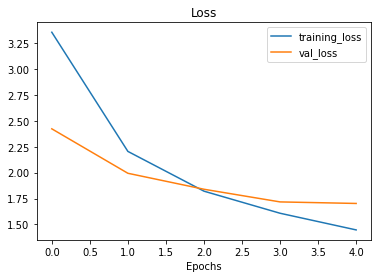

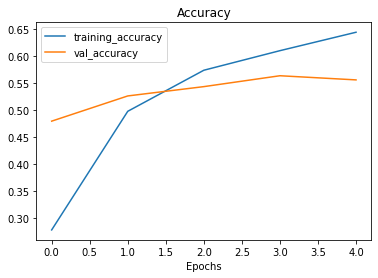

In [18]:
plot_loss_curves(history_0)

## 6. Fine Tuning

### 1. Unfreezing layers in Base Model

In [19]:
base_model.trainable = True
## Refreeze every layers except last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [20]:
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["accuracy"]
)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
fine_tune_epochs = 10
history_1 = model_0.fit(train_data,
            epochs = fine_tune_epochs,
            initial_epoch = history_0.epoch[-1],
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = int(0.15*len(test_data))
            )

Epoch 5/10
237/237 [==============================] - 60s 225ms/step - loss: 1.2118 - accuracy: 0.6870 - val_loss: 1.6952 - val_accuracy: 0.5442
Epoch 6/10
237/237 [==============================] - 48s 200ms/step - loss: 1.1008 - accuracy: 0.7051 - val_loss: 1.7252 - val_accuracy: 0.5445
Epoch 7/10
237/237 [==============================] - 49s 205ms/step - loss: 1.0149 - accuracy: 0.7345 - val_loss: 1.7129 - val_accuracy: 0.5487
Epoch 8/10
237/237 [==============================] - 44s 186ms/step - loss: 0.9432 - accuracy: 0.7562 - val_loss: 1.7235 - val_accuracy: 0.5479
Epoch 9/10
237/237 [==============================] - 45s 187ms/step - loss: 0.8822 - accuracy: 0.7648 - val_loss: 1.6724 - val_accuracy: 0.5593
Epoch 10/10
237/237 [==============================] - 44s 183ms/step - loss: 0.8301 - accuracy: 0.7801 - val_loss: 1.7195 - val_accuracy: 0.5485


In [23]:
fine_tuned_results = model_0.evaluate(test_data)
fine_tuned_results

790/790 [==============================] - 63s 80ms/step - loss: 1.4985 - accuracy: 0.6021


[1.4984606504440308, 0.6020990014076233]

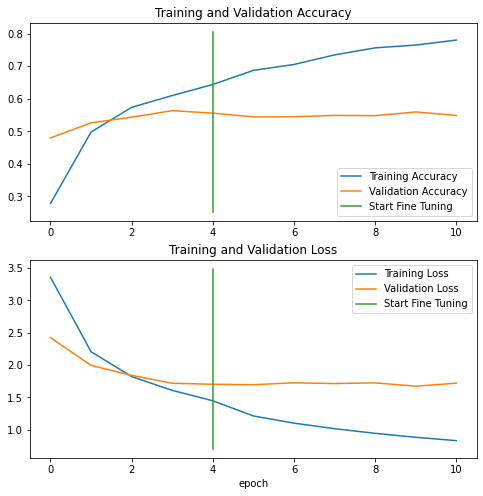

In [25]:
from helper_functions import compare_historys
compare_historys(history_0,history_1,initial_epochs = 5)

## 7. Saving and loading our model

In [26]:
model_0.save("drive/MyDrive/MyModels/101_food_classes_10_percent_saved")

In [27]:
loaded_model = tf.keras.models.load_model("drive/MyDrive/MyModels/101_food_classes_10_percent_saved")

In [28]:
loaded_model.evaluate(test_data)

790/790 [==============================] - 62s 77ms/step - loss: 1.4985 - accuracy: 0.6021


[1.4984608888626099, 0.6020990014076233]